# CSCI E 7 Homework 10

## 2021

## Fill in your name

In [1]:
first_name = "Roxanne"
last_name = "Saewong"
nick_name = "Roxy"

assert(len(first_name) != 0), "First name is missing"
assert(len(last_name)  != 0), "Last name is missing"
assert(len(nick_name)  != 0), "Nickname is missing"

PREESA SAEWONG REE


# Problem 1: Subslice

List A is a subslice of list B if you can find x and y such that
```python
A = B[x:y]
```
Write a function that decides if A is a subslice of B

In [2]:
from typing import List 

def is_subslice(list_a: List, list_b: List) -> bool:
    """Check if list A is a subslice of list B"""
    flag = False
    ## Case 01: When list A is empty, it's a subslice of list B. 
    if len(list_a) == 0: 
        flag = True 
    ## Case 02: If list A is longer than list B, A can't be a subslice of B. 
    elif len(list_a) > len(list_b):
        flag = False 
    ## Case 03: If 0 < length of list A <= length of list B. 
    else: 
        try: 
            for i in range(len(list_a)): 
                if list_a[i] == list_b[list_b.index(list_a[0]) + i]: 
                    print(f"Current item in list A: {list_a[i]}")
                    print(f"Corresponding item in list B: {list_b[list_b.index(list_a[0]) + i]}")
                    flag = True 
#                 else: 
#                     flag = False 
#                     break 
                ## When finishing with the last item, break out of the loop 
                if i == len(list_a) - 1: 
                    break
        except IndexError: 
            flag = False 
    return flag

    ## Case 03: Else, list A can only be as long as or shorter than list B. 
#     else: 
#         ## Case 03A: If list A and list B have the same length, we can also say list A is a subslice of list B. 
#         if list_a == list_b: 
#             flag = True 
#         ## Case 03B: List A must be shorter than list B. 
#         else: 
#             ## Check if all items in list A are in list B, then check if they're in the same sequence in both list A and list B. 
#             if(all(a in list_b for a in list_a)): 
#             n = len(list_a)
#             for i in range(len(list_b) - n): 
#                 if list_a == list_b[i:i + n]: 
#                     flag = True 
#             for a in list_a: 
#                 i_a = list_a.index(a)
#                 i_b = list_b.index(a)
#                 if i_a == list_a[-1]: 
#                     break 
#                 if i_b - i_a == (i_b + 1) - (i_a + 1):  
#                     flag = True 
#             for a in list_a: 
#                 if a in list_b: 
#                     ## Index of the next item after the current
#                     i_next = list_b.index(a) + 1
#                     if list_a[i_next] == list_b[i_next]: 
#                         flag = True 


### Unit Tests

In [3]:
def test_subslice():
    assert(is_subslice([], []))
    assert(is_subslice([], [1, 2, 3, 4, 5]))
    assert(is_subslice([1, 2, 3], [1, 2, 3, 4, 5]))
    assert(is_subslice([3, 4, 5], [1, 2, 3, 4, 5]))
    assert(is_subslice([5, 3, 4], [5, 1, 2, 5, 3, 4, 5, 3, 2, 1]))
    assert(is_subslice([], [1, 2, 3, 4, 5]))
    assert(is_subslice([3, 4], [1, 2, 3, 4, 5]))
    assert(is_subslice([1, 2, 3], [1, 2, 3]))
    assert(is_subslice([1, 2, 3], [1, 2, 1, 2, 3, 4, 5])) # If at first you don't succeed
    assert(not is_subslice([1, 2], [12]))
    assert(not is_subslice([1, 2], [2, 1]))
    assert(not is_subslice([1, 2, 3, 4, 5], [2, 3, 4]))
    assert(not is_subslice([1, 3, 5], [1, 2, 3, 4, 5])) # This is a subset, but isn't a subslice
    
    print('Success!')
    
test_subslice()

Current item in list A: 1
Corresponding item in list B: 1
Current item in list A: 2
Corresponding item in list B: 2
Current item in list A: 3
Corresponding item in list B: 3
Current item in list A: 3
Corresponding item in list B: 3
Current item in list A: 4
Corresponding item in list B: 4
Current item in list A: 5
Corresponding item in list B: 5
Current item in list A: 5
Corresponding item in list B: 5
Current item in list A: 3
Corresponding item in list B: 3
Current item in list A: 4
Corresponding item in list B: 4
Current item in list A: 1
Corresponding item in list B: 1
Current item in list A: 2
Corresponding item in list B: 2
Current item in list A: 3
Corresponding item in list B: 3
Current item in list A: 1
Corresponding item in list B: 1
Current item in list A: 2
Corresponding item in list B: 2
Current item in list A: 1
Corresponding item in list B: 1
Current item in list A: 1
Corresponding item in list B: 1


AssertionError: 

# Problem 2: Word Lengths
We are interested in the distribution of word lengths in English words.  We will use our file words.txt.  

Write a function wordLengths() that takes a path to a list of words and returns a list with tuples holding the number of words of each word length.

Sort your list by length of word.

Here are my partial results: words.txt holds 85 words of length 2, 908 words of length 3, and 3 words of length 21.
```python
    [(2, 85), (3, 908), ... (21, 3)]
```

In [4]:
from typing import List


def read_file(filepath: str) -> List: 
    try: 
        with open(filepath, 'r') as file:
            data = [line.strip() for line in file]
        # print(len(data), data)
        return data 
    except FileNotFoundError: 
        print(f"The file {filepath} cannot be found.")
    except: 
        print(f"An error occurs while reading in the file {filepath}")
    return []


def wordLengths(filepath: str) -> List:
    """This function returns the sorted list of the number of words of each length."""
    data_list = read_file(filepath) 
    ## Start counting 
    counts = {}
    for item in data_list:
        if len(item) in counts: 
            counts[len(item)] += 1 
        else: 
            counts[len(item)] = 1 
    ## Sort the dictionary by its values (the 2nd item of each tuple in the list) in the reversed order 
    ## Key parameter to specify a function to be called on each list element prior to making comparisons
    return sorted(counts.items(), key=lambda x: x[0], reverse=False)


### Unit Tests

In [5]:
## Change this to point to your copy of words.txt
filepath = 'words.txt'

def test_wordLengths(filepath):
    lst = wordLengths(filepath)
    print(lst)
    
    print(lst[0])
    assert lst[0] == (2, 85)
    assert lst[1] == (3, 908)
    assert lst[5] == (7, 21727)
    assert lst[-1] == (21, 3)
    
    print('\nSuccess!')

test_wordLengths(filepath)

[(2, 85), (3, 908), (4, 3686), (5, 8258), (6, 14374), (7, 21727), (8, 26447), (9, 16658), (10, 9199), (11, 5296), (12, 3166), (13, 1960), (14, 1023), (15, 557), (16, 261), (17, 132), (18, 48), (19, 16), (20, 5), (21, 3)]
(2, 85)

Success!


# Problem 3: Draw a bar chart of the word lengths

Use matplotlib to draw a bar chart of the word lengths.  You may want to peek at the documentation

https://matplotlib.org/3.3.1/gallery/pyplots/pyplot_text.html#sphx-glr-gallery-pyplots-pyplot-text-py

or at this tutorial

https://datatofish.com/bar-chart-python-matplotlib/

You may want to start with the vidoes I posted in Modules/Video Links/Libraries

Your bar chart should lineup with your results from problem 1.

In [6]:
import matplotlib.pyplot as plt


word_len_freq = wordLengths('words.txt')
print(word_len_freq)

def plot_bar_chart(filepath):
    """This function plots a histogram of word lengths."""
    word_len = [length[0] for length in word_len_freq]
    freq = [freq[1] for freq in word_len_freq]
    # print(word_len)
    # print(freq)
    ## Start plotting the bar chart 
    plt.bar(word_len, freq)
    plt.title('Word Length Frequency Bar Chart')
    plt.xlabel('Word Length')
    plt.ylabel('Frequency')
    plt.show()


[(2, 85), (3, 908), (4, 3686), (5, 8258), (6, 14374), (7, 21727), (8, 26447), (9, 16658), (10, 9199), (11, 5296), (12, 3166), (13, 1960), (14, 1023), (15, 557), (16, 261), (17, 132), (18, 48), (19, 16), (20, 5), (21, 3)]


### Unit Test

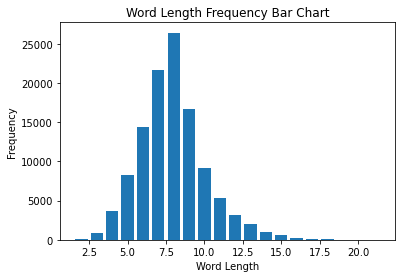

In [7]:
## Use the variable filepath defined above

plot_bar_chart('words.txt')

# Problem 4: Count Pairs

Write a program to count the frequency of each pair of letters in a Fasta file holding a DNA sequence.

Fasta files have a one line header describing the source, and a sequence of lines with information.  
They are used to hold DNA or Amino Acid sequences.  

For example, the file pACYC184.fasta holds a DNA sequence of length 4245, which starts as

```python
GAATTCCGG...
```

That holds the pairs GA, AA, AT, TT, TC, CC, CG, GG, ...

You could store your data in a 2D array, a list of 4 lists of length 4, 
or you could store your data in a Dictionary mapping strings of length 2 to integers.    

Count the frequency of each pair, and print a chart.  For pACYC184.fasta, the chart should look like this:

```python
        A       G       C       T 
A     251     212     231     262 
G     229     287     361     216 
C     288     312     291     276 
T     188     282     284     274 
```
The function print_pair_count() has 'print' in the title, so you may print from the function.

from typing import ListI suggest having functions to read the data, count the pairs, and print the chart.  

In [8]:
from typing import List


def read_file(filepath: str) -> str: 
    """This function takes a Fasta file and returns the DNA code as a string."""
    try: 
        with open(filepath, 'r') as file:
            data = [line.strip() for line in file]
        ## Remove the header row 
        data = data[1:]
        ## Remove empty strings in the list and join into a string 
        data = ''.join([datum for datum in data if datum])
        # print(len(data), data)
        return data 
    except FileNotFoundError: 
        print(f"The file {filename} cannot be found.")
    except: 
        print(f"An error occurs while reading in the file {filename}")
    return ''


def count_freq(dna_seq_list: List[str]) -> dict:
    """This function takes a list of strings, counts and returns the frequence of each unique pair."""
    counts = {}
    for code in dna_seq_list:
        if code in counts:
            counts[code] = counts[code] + 1
        else:
            counts[code] = 1
    return counts


def print_pair_count(filename):
    """This function prints a chart showing frequency of base pairs in Fasta file"""
    dna_seq = read_file(filename)
    ## Get all the unique letters of the DNA code string  
    dna_code = sorted(list(set(dna_seq)), reverse=False) 
    ## Cut the long string into pairs of letter combination 
    dna_seq_list = [dna_seq[i] + dna_seq[i+1] for i in range(0, len(dna_seq)-1)]
    # print(dna_seq_list)
    dna_pair_freq = count_freq(dna_seq_list)
    # print(dna_pair_freq)
    
    ## Leave the 1st column on the 1st row empty
    print(' ', end='\t')
    ## Print column names/headers 
    for letter in dna_code: 
        print(letter, end='\t')
    ## Go to the next line 
    print()
    
    ## Show the data row by row 
    for row, key in zip(dna_code, dna_pair_freq):
        ## Print a DNA letter as row name
        print(row, end='\t')
        ## Print frequences on this row 
        for col in dna_code: 
            print(dna_pair_freq[row + col], end='\t')
        ## Go to the next line 
        print()


print_pair_count('pACYC184.fasta')

 	A	C	G	T	
A	251	231	212	262	
C	288	291	312	276	
G	229	361	287	216	
T	188	284	282	274	


### Unit Tests

You will need to have copies of the three datasets in your directory.  

Be sure to check the lengths of your strings: you don't want the newlines from the file included in your strings.

## Run your program on the datasets below

In [9]:
print_pair_count('pKLMF-FX.fasta')  # string of length 9988

 	A	C	G	T	
A	859	560	623	629	
C	639	565	550	599	
G	626	627	582	557	
T	546	601	638	786	


In [10]:
print_pair_count('ecoli.fasta')     # string of length 4641652

 	A	C	G	T	
A	338006	256773	238013	309950	
C	325327	271821	346793	236149	
G	267384	384102	270252	255699	
T	212024	267395	322379	339584	


In [11]:
print_pair_count('Human22.fasta')   # string of length 31264301

 	A	C	G	T	
A	2364973	1594610	2360439	1797885	
C	2414606	2237613	513594	2358130	
G	1906206	1784420	2238900	1590558	
T	1432121	1907300	2407152	2355793	


Does anything seem odd in the last table?

# Problem 5: The Extension School
Use Beautiful Soup to examine the base landing page https://www.extension.harvard.edu

How many links are there?

Links may be relatve or absolute:
    /academics/programs/academic-gap-year/ is a relative link: you get an absolute link by adding the base
            
    https://www.extension.harvard.edu/academics/programs/academic-gap-year/
    
How many links are relative?  How many are relative, and how many are absolute?

(Why would a relative path be useful?)

How many links appear twice?

Which links appear three times?  

## Find all the links

In [12]:
import requests
from bs4 import BeautifulSoup

url = "https://www.extension.harvard.edu/academics/programs/academic-gap-year/"
page = requests.get(url)
soup = BeautifulSoup(page.content, "html.parser")
# print(soup)

url_list = []

for a in soup.find_all('a', href=True):
    url_list.append(a['href'])

## How many links are there?

In [13]:
## 113 links 
print(f"There are altogether {len(url_list)} URLs on {url}. Check out the URL list:\n{url_list}")

There are altogether 113 URLs on https://www.extension.harvard.edu/academics/programs/academic-gap-year/. Check out the URL list:
['#content', '/about/news-press/covid-19-updates/', 'https://extension.harvard.edu', 'https://extension.harvard.edu/academics/', '/academics/programs/take-a-course/', 'https://extension.harvard.edu/academics/academics-graduate-degrees/', 'https://extension.harvard.edu/academics/graduate-certificates/', 'https://extension.harvard.edu/academics/undergraduate-degree-and-certificates/', 'https://extension.harvard.edu/academics/programs/premedical-program/', '/academics/programs/academic-gap-year/', 'https://extension.harvard.edu/registration-admissions/', 'https://extension.harvard.edu/registration-admissions/course-registration/', 'https://extension.harvard.edu/registration-admissions/degree-program-admissions/', 'https://extension.harvard.edu/registration-admissions/pursuing-a-certificate/', 'https://extension.harvard.edu/for-students/', '/academics/programs/p

## How many are relative links?

In [14]:
## 22 relative links 
rel_url_count = 0
for url in url_list: 
    if url.startswith("https://"): 
        rel_url_count += 1

print(f"There are altogether {rel_url_count} absolute links. Thus, there are {len(url_list) - rel_url_count} relative links.")

There are altogether 91 absolute links. Thus, there are 22 relative links.


## How many links appear exactly twice?

In [15]:
import collections


counter = collections.Counter(url_list)
url_freq = dict(counter)
# print(url_freq)

In [16]:
count_twice = 0 
for v in url_freq.values(): 
    if v == 2: 
        count_twice += 1 

print(f"There are {count_twice} links that appear twice.")

There are 31 links that appear twice.


## Which links appear three or more times?

In [17]:
count_multiple = 0 
for v in url_freq.values(): 
    if v >= 3: 
        count_multiple += 1 

print(f"There are {count_multiple} links that appear more than twice.")

There are 4 links that appear more than twice.


# Post Mortem
## How long did it take you to solve this problem set?
## Did anything confuse you or cause difficulty?

In [18]:
## Problem 1 got me stumped. 
## 2 days 
## 2021-11-07 16:32:26 to 2021-11-07 22:22:41
## 2021-11-08 01:42:32 to 2021-11-08 05:28:39
## 2021-11-08 16:14:02 to 2021-11-08 17:15:00
## 2021-11-08 00:36:31 to 2021-11-08 03:48:19